<a href="https://colab.research.google.com/github/Adansote/Limpieza-de-datos-con-jupyter-python/blob/main/Limpieza_datos_pythonJupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**importando datos csv**

In [6]:
data = pd.read_csv("/content/sample_data/dataset_banco.csv")

 **lectura del data set con un read_csv**

usar un shape para  ver el tamaño de los datos

In [7]:
print(data.shape)

(45215, 17)


**metodo head para imprimir las primeras 5 lineas**

In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


** con la funcion info nostrae el tipo de dato de cada columna y la cantidad de columnas que contiene el archivo**

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


**Limpieza de datos proceso **

*   El manejo de datos faltantes (que como lo acabamos de ver están presentes en nuestro set de datos)
*  La eliminación de columnas irrelevantes (es decir, columnas que no contienen información relacionada con el problema que queremos resolver)

*   El manejo de registros (filas) repetidos
*   el manejo de registros(filas )repetidas

*   el manejo de valores extremos (outliers) para el caso de las variables (columnas ) numericas
*  La limpieza de errores tipográficos que puedan existir en las variables categóricas







Cuando tenemos un dato faltante en Pandas este dato es marcado como «NaN» (o «Not A Number») y por tanto podemos implementar la eliminación de estas filas usando el método «dropna()» de Pandas:

In [10]:
data.dropna(inplace=True)

**Para verificar que se han eliminado correctamente los registros incompletos podemos usar nuevamente el método «info()» obteniendo este resultado:e**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45207 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45207 non-null  int64  
 1   job        45207 non-null  object 
 2   marital    45207 non-null  object 
 3   education  45207 non-null  object 
 4   default    45207 non-null  object 
 5   balance    45207 non-null  float64
 6   housing    45207 non-null  object 
 7   loan       45207 non-null  object 
 8   contact    45207 non-null  object 
 9   day        45207 non-null  int64  
 10  month      45207 non-null  object 
 11  duration   45207 non-null  float64
 12  campaign   45207 non-null  int64  
 13  pdays      45207 non-null  float64
 14  previous   45207 non-null  int64  
 15  poutcome   45207 non-null  object 
 16  y          45207 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 6.2+ MB


**Eliminación de columnas irrelevantes**


*   No contiene información relacionada con el problema que queremos resolver. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
*   Una columna categórica pero con un sólo nivel. Por ejemplo si en la columna «job» solo tuviésemos el nivel «unknown» esta columna no aporta información que nos permita diferenciar un perfil de cliente de otro

*  Una columna numérica pero con un sólo valor. Por ejemplo si en la columna «edad» todos los valores fuesen iguales a 50 ocurriría algo similar al caso anterior, pues no aportaría información para diferencial unos clientes de otros
*   Columnas con información redundante. Por ejemplo si además de las columnas «month» y «day» tuviésemos la columna «month-day», esta última columna no aportaría información adicional al análisis





Comencemos analizando entonces las columnas categóricas. Primero definamos una lista de Python que contenga los nombres de estas columnas:

In [12]:
cols_cat =['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

Y ahora hagamos uso del método «nunique()» aplicado a cada columna. Este método nos permite determinar los diferentes niveles de cada variable categórica:

In [14]:
for col in cols_cat:
    print(f" {col}: {data[col].nunique()} subniveles ")

 job: 18 subniveles 
 marital: 6 subniveles 
 education: 10 subniveles 
 default: 2 subniveles 
 housing: 2 subniveles 
 loan: 6 subniveles 
 contact: 5 subniveles 
 month: 12 subniveles 
 poutcome: 6 subniveles 
 y: 2 subniveles 


Hagamos algo similar pero para las variables numéricas. En este caso podemos usar el método «describe()» que nos mostrará en pantalla una tabla sintetizando algunos parámetros estadísticos básicos de dichas variables numéricas (como la media, el rango intercuartiles y la desviación estándar, entre otras).

Así, una variable numérica que contenga un sólo valor nos arrojará una desviación estándar igual a cero y podría ser eliminada:

In [15]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000,45207.000000
mean,41.005596,1374.201318,15.806534,258.032539,2.763731,40.178225,0.580198
std,12.037399,3924.491665,8.323015,257.460759,3.098058,100.103283,2.303341
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1427.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Y al observar la fila «std» (que contiene las diferentes desviaciones estándar) podemos verificar que ninguno de los valores es iguales a cero. Así que en este caso tampoco eliminaremos ninguna columna numérica.

**Detección y manejo de registros repetidos**

In [16]:
print(f"Tamaño del set antes de eliminar las filas repetidas:{data.shape} ")
data.drop_duplicates(inplace=True)
print(f"Tamaño del set despues de eliminar las filas repetidas:{data.shape} ")


Tamaño del set antes de eliminar las filas repetidas:(45207, 17) 
Tamaño del set despues de eliminar las filas repetidas:(45203, 17) 


**Detección y manejo de valores extremos**
Los valores extremos (u «outliers») son aquellos datos atípicos que se salen del rango «normal» de la mayoría de los datos. Y estos valores extremos pueden estar presentes tanto en las variables numéricas como en las variables categóricas.

Por ejemplo, un valor extremo en una variable como la edad (columna «age») podría ser por ejemplo un valor negativo (¡pues la edad no puede ser una cantidad negativa!) o podría ser también una edad de, por ejemplo, 150 años.
Y en una variable categórica como la columna «job» (tipo de trabajo) podría ser un tipo de trabajo poco frecuente, es decir que aparezca muy pocas veces en la totalidad del set de datos.
Así que usaremos estos «boxplots» para verificar si existen valores extremos en las variables numéricas de nuestro set de datos. Comencemos definiendo una lista de Python con estas variables numéricas:


In [17]:
cols_num =['age', 'balance', 'day', 'duration', 'campaign',
            'pdays', 'previous']

Y ahora usemos la función «boxplot()» de la librería Seaborn para generar un gráfico de caja para cada una de las variables numéricas:

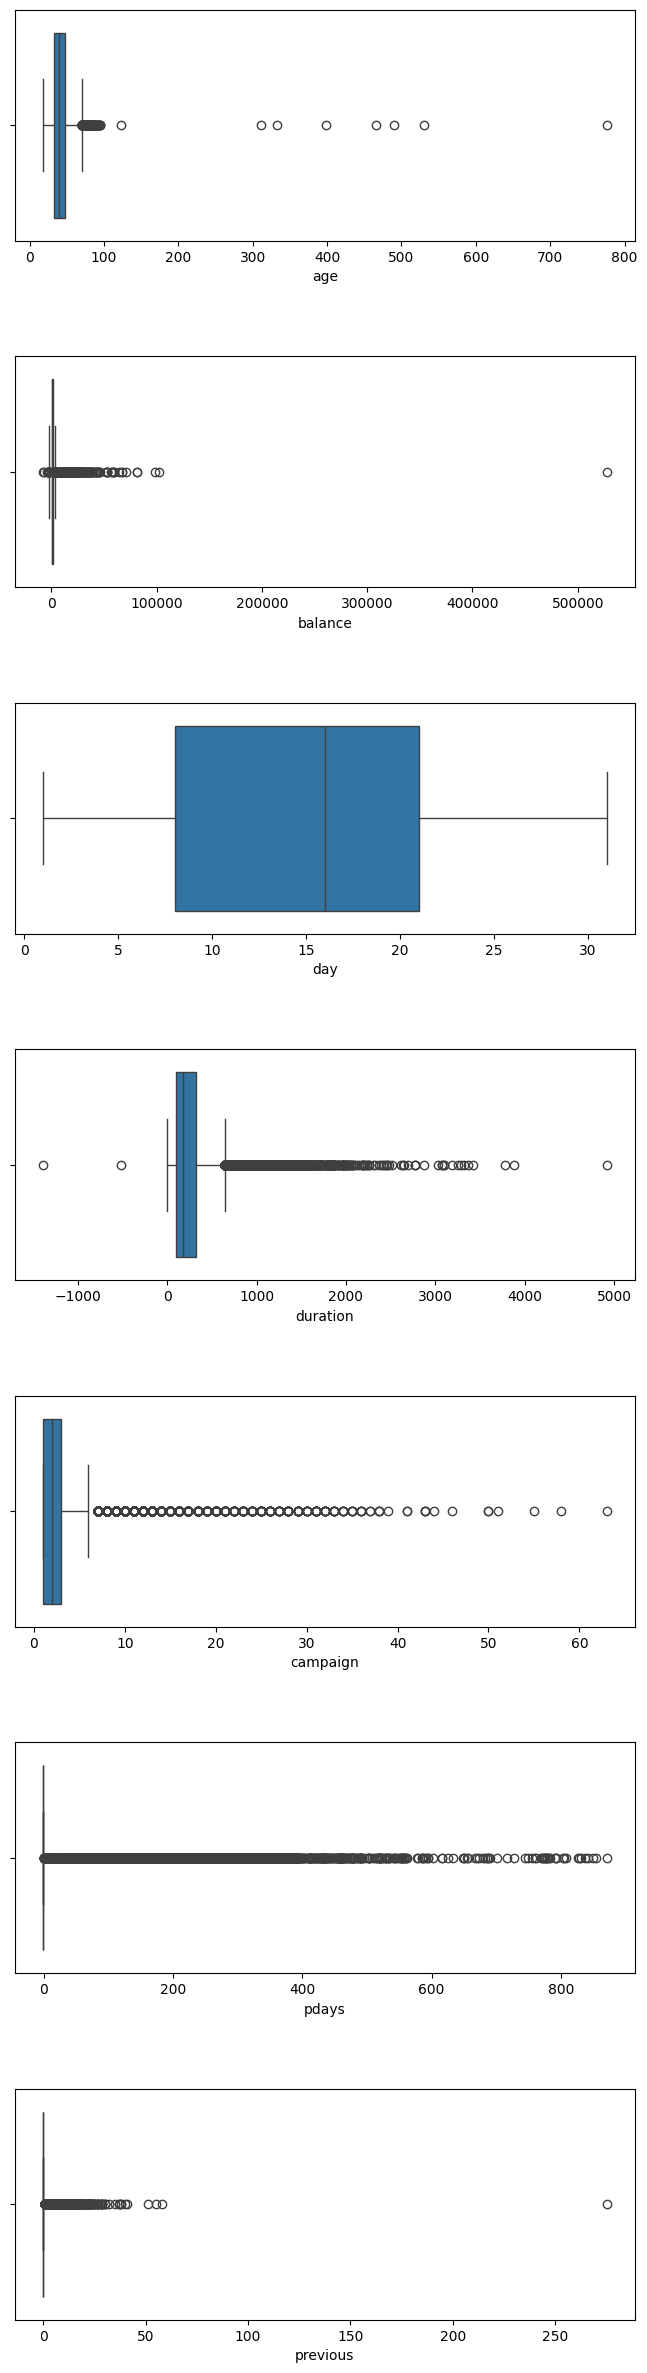

In [18]:
fig, ax =plt.subplots(nrows=7, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(cols_num):
    sns.boxplot(data=data, x=col, ax=ax[i])

En este caso vemos que cada gráfico contiene precisamente una caja (de allí el nombre de «boxplots») de color azul. Los límites de esta caja corresponden a los cuartiles 1 y 3 entre los cuales se encuentra el 50% de los datos.

Además, más allá de estos límites de la caja, a izquierda y derecha, encontramos los «whiskers» o «bigotes» que son los límites por debajo y por encima de los cuales tendremos precisamente valores extremos (estos «whiskers» se ven claramente por ejemplo en los gráficos para las variables «day» y «duration»).

Y estos valores extremos son esencialmente los puntos que aparecen por fuera de estos «bigotes». Así que interpretando el contenido de estos gráficos de caja podemos observar lo siguiente:



*   Para la variable «age» tenemos valores extremos que corresponden a edades mucho mayores a 100 años
*   Para la variable «duration» (la duración del depósito a término adquirida por el cliente) existen valores negativos

*  Y en la variable «previous» (que indica el número de veces que la persona ha sido contactada antes de esta campaña) se tiene un valor extremadamente alto (cercano a 300)






**Estos son precisamente valores extremos que debemos manejar. Y en este caso existen dos alternativas:**



*  La eliminación de estos registros
*  El recorte, que implica cambiar los valores extremos para llevarlos al rango «normal» de valores
*   La imputación usando información de registros similares

Como en este caso tenemos muy pocos valores extremos en cada una de las variables mencionadas, resulta suficiente usar la técnica de eliminación.




Comencemos eliminando los valores extremos en la variable edad (columna «age») lo cual equivale a preservar únicamente los sujetos cuyas edades sean, por ejemplo, menores o iguales a 100. Vamos a imprimir el tamaño del dataset antes y después de la eliminación para verificar los cambios en la cantidad total de datos:

In [19]:
print(f"Tamaño del set antes de eliminar los registros de edad:{data.shape} ")
data = data[data['age'] <= 100]
print(f"Tamaño del set despues de eliminar los registros de edad :{data.shape} ")

Tamaño del set antes de eliminar los registros de edad:(45203, 17) 
Tamaño del set despues de eliminar los registros de edad :(45195, 17) 


donde en la línea 2 hemos simplemente establecido la condición «data[‘age’]<=100» para preservar únicamente los registros que se encuentran en el rango normal. Antes de ejecutar esta línea de código teníamos 45.203 registros y después del manejo de estos valores extremos tendremos 45.195 (es decir, hemos eliminado 8 registros).

Usemos una sintaxis similar pero para preservar duraciones (columna «duration») mayores a cero:

In [20]:
print(f"Tamaño del set antes de eliminar los registros de duracion:{data.shape} ")
data = data[data['duration'] >= 0]
print(f"Tamaño del set despues de eliminar los registros de duracion :{data.shape} ")

Tamaño del set antes de eliminar los registros de duracion:(45195, 17) 
Tamaño del set despues de eliminar los registros de duracion :(45193, 17) 


Y en este caso hemos pasado de 45.195 a 45.190 registros después de la eliminación de estos «outliers».

Y finalmente eliminemos las filas cuyo valor en la columna «previos» es mayor que 100 (lo cual equivale a preservar los registros con valores menores o iguales a 100):

In [21]:
print(f"Tamaño del set antes de eliminar los registros de previos:{data.shape} ")
data = data[data['previous'] <= 100]
print(f"Tamaño del set despues de eliminar los registros de previos :{data.shape} ")

Tamaño del set antes de eliminar los registros de previos:(45193, 17) 
Tamaño del set despues de eliminar los registros de previos :(45192, 17) 


Y en este último caso partimos de 45.190 para tras la eliminación obtener 45.189.

** Corrección de errores tipográficos o equivalencias**

Los errores tipográficos pueden corresponder a sub-niveles dentro de una variable categórica que estén escritos incorrectamente. Por ejemplo, podríamos tener un nivel como «mobile» en la variable «contact» y un sub-nivel similar pero escrito incorrectamente, como por ejemplo «mobiiile».

Por otra parte, pueden aparecer sub-niveles como «unknown» y «UNK» que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Así que podemos usar el método «value_counts()» aplicado sobre cada columna para imprimir en pantalla todos sus sub-niveles:



In [22]:
for col in cols_cat:
    print(data[col].value_counts())
    print("-"*20)

job
blue-collar       9727
management        9452
technician        7593
admin.            5165
services          4151
retired           2262
self-employed     1577
entrepreneur      1487
unemployed        1303
housemaid         1240
student            937
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64
--------------------
marital
married     27203
single      12781
divorced     5194
div.            7
Single          4
DIVORCED        3
Name: count, dtype: int64
--------------------
education
secondary    23183
tertiary     13297
primary       6846
unknown       1855
SECONDARY        3
Primary          2
UNK              2
sec.             2
Secondary        1
Tertiary         1
Name: count, dtype: int64
--------------------
default
no     44377
yes      815
Name: count, dtype: int64
--------------------
housing
yes    25113
no     20079
Name: coun

En primer lugar podemos observar que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula (por ejemplo en la variable «job» donde tenemos «self-employed» y «Self-employed» o «management» y «MANAGEMENT»).

Unifiquemos esta representación inicialmente representando todo el texto en minúsculas usando el método «str.lower()»:

In [23]:
for column in data.columns:
  # representar minusculas  solo si loa columna es categorica
  if column in cols_cat:
    data[column] = data[column].str.lower()

Ejecutemos el bloque de código anterior nuevamente para verificar que estos cambios ya aparecen reflejados en los sub-niveles de cada variable categórica:

In [24]:
for col in cols_cat:
  print(data[col].value_counts())
  print("-"*20)

job
blue-collar       9727
management        9456
technician        7593
admin.            5165
services          4152
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            937
unknown            288
administrative       3
Name: count, dtype: int64
--------------------
marital
married     27203
single      12785
divorced     5197
div.            7
Name: count, dtype: int64
--------------------
education
secondary    23187
tertiary     13298
primary       6848
unknown       1855
sec.             2
unk              2
Name: count, dtype: int64
--------------------
default
no     44377
yes      815
Name: count, dtype: int64
--------------------
housing
yes    25113
no     20079
Name: count, dtype: int64
--------------------
loan
no     37950
yes     7242
Name: count, dtype: int64
--------------------
contact
cellular     29273
unknown      13012
telephone     2901
phone            3
mobile           3
Name: cou

Y podemos verificar que ya hemos corregido estas inconsistencias:

Ahora analicemos cada variable de manera individual para verificar otras posibles inconsistencias:

«job»: se tienen equivalencias entre «admin.» y «administrative»
«marital»: se tienen equivalencias entre «divorced» y «div.»
«education»: se tienen equivalencias entre «secondary» y «sec.» y entre «unknown» y «unk.»
«contact»: se tienen equivalencias entre «cellular» y «mobile» y entre «telephone» y «phone»

Así que lo que nos resta es corregir estas equivalencias. Comencemos con la variable «job» donde reemplazarmos «admin.» por «administrative» usando nuevamente el método «str.replace()»:

In [25]:
data["job"] = data['job'].str.replace("admin.", "administrative", regex=False)

Hagamos algo similar para la columna «marital», reemplazando «div.» por «divorced»:

In [26]:
data["marital"] = data['marital'].str.replace("div.", "divorced", regex=False)


Y también usaremos una sintaxis similar para reemplazar «sec.» por «secondary» en la columna «education»:

In [27]:
data["education"] = data['education'].str.replace("sec.", "secondary", regex=False)

Y si en esta misma columna queremos reemplazar «unk» por «unknown» podríamos usar el mismo enfoque anterior o esta alternativa (usando el método «loc»):

In [28]:
data.loc[data['education']== "unk", "education"] = "unknown"

Y usemos este mismo enfoque para reemplazar «phone» por «telephone» y «mobile» por «cellular» en la columna «contact»:

In [29]:
data.loc[data["contact"] == "phone", "contact"] = "telephone"
data.loc[data["contact"] == "mobile", "contact"] = "cellular"

«job»: «self-employed» y «Self-employed», «retired» y «Retired» y «management» y «MANAGEMENT»

In [30]:
print(data)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no   2143.0     yes   no   
1       44    technician    single  secondary      no     29.0     yes   no   
2       33  entrepreneur   married  secondary      no      2.0     yes  yes   
3       47   blue-collar   married    unknown      no   1506.0     yes   no   
4       33       unknown    single    unknown      no      1.0      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45210   51    technician   married   tertiary      no    825.0      no   no   
45211   71       retired  divorced    primary      no   1729.0      no   no   
45212   72       retired   married  secondary      no   5715.0      no   no   
45213   57   blue-collar   married  secondary      no    668.0      no   no   
45214   37  entrepreneur   married  secondary      no   2971.0      no   no   

         contact  day month  duration  campaign  pd

** Limpieza de datos completada**